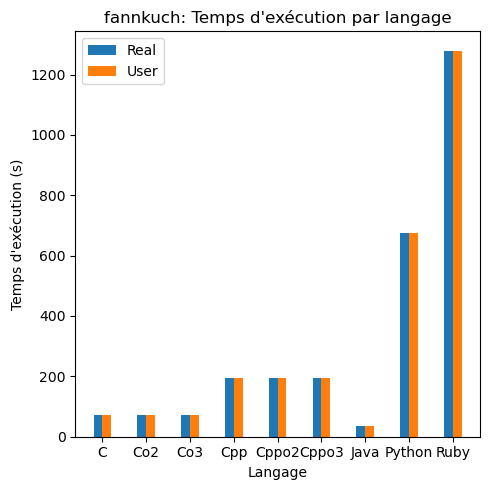

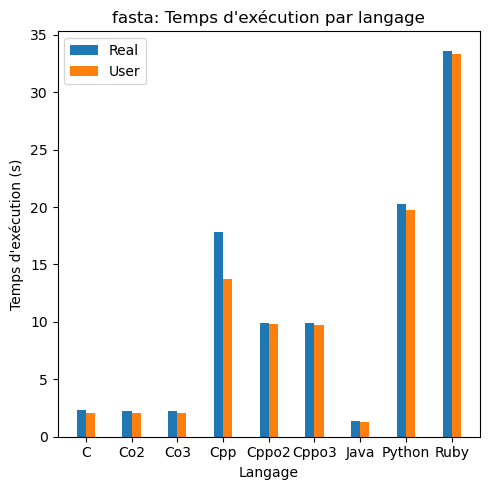

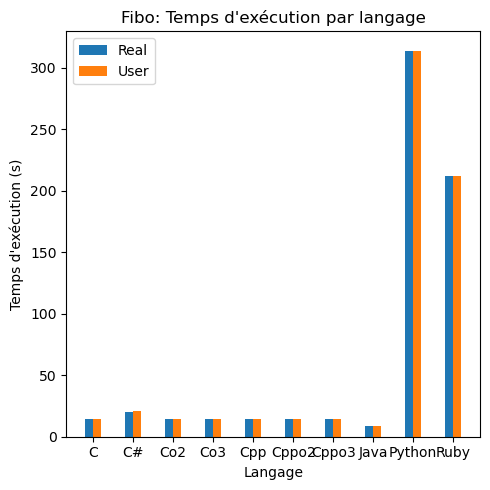

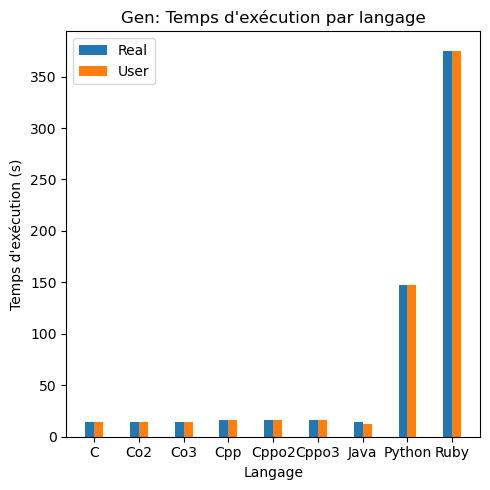

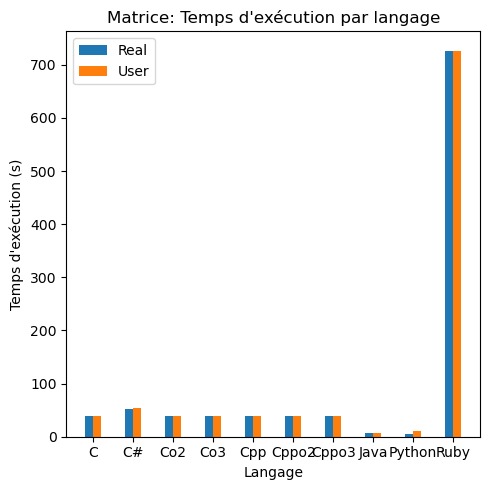

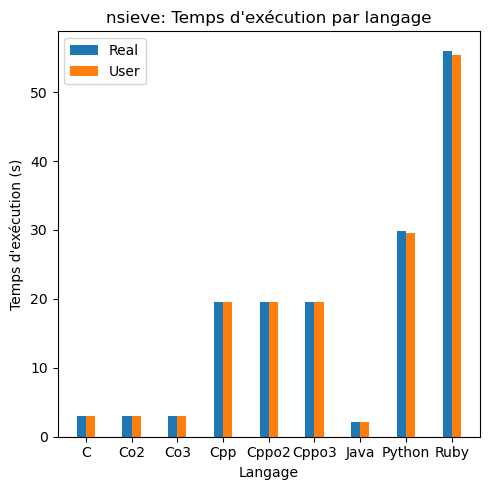

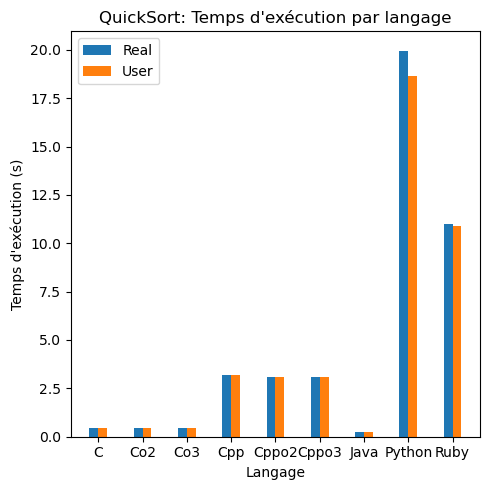

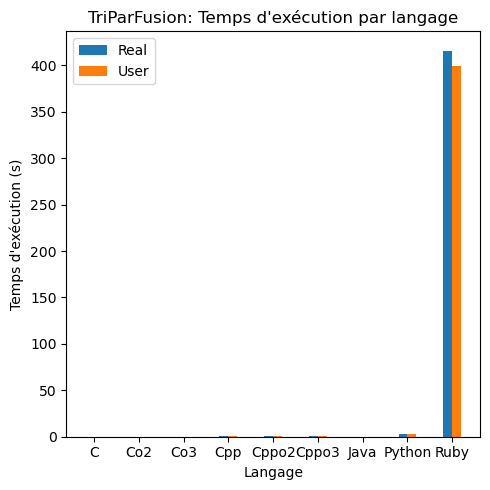

In [9]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['fannkuch', 'fasta', 'Fibo', 'Gen', 'Matrice', 'nsieve', 'QuickSort', 'TriParFusion']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier timeS.txt existe dans le dossier actuel
    if 'timeS.txt' in os.listdir(folder):
        # Ouvrir le fichier "timeS.txt" en mode lecture
        with open(os.path.join(folder, 'timeS.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage
                langage_match = re.match(r'time_results/time_results_(\w+).txt:', line)
                if langage_match:
                    langage = langage_match.group(1).capitalize()
                    if langage == 'Csharp':
                        langage = 'C#'
                else:
                    continue

                # Lire la ligne suivante pour obtenir les temps de résulat
                results_line = next(file)
                real_value = float(re.search(r'real:\s*(\d+\.\d+)', results_line).group(1))
                user_value = float(re.search(r'user:\s*(\d+\.\d+)', results_line).group(1))
                sys_value = float(re.search(r'sys:\s*(\d+\.\d+)', results_line).group(1))

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'real': real_value,
                    'user': user_value,
                    'sys': sys_value
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)

        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['Cpp','Co2','Co3','Cppo2','Cppo3', 'C', 'Java', 'Ruby', 'Python','C#'])]
        
        # Trier les données dans l'ordre 
        
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)
        
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)
        
        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['real'], bar_width, label='Real')
        axs.bar([i + bar_width for i in index], df_filtered['user'], bar_width, label='User')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Temps d\'exécution (s)')
        axs.set_title(folder+': Temps d\'exécution par langage')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


On peut voir que le temps d'éxécution varie considérablement entre les différents langages.

### Fannkuch : 
- Exécuté avec paramètre d'entrée = 1
| Rang | Langage |
|------|---------|
| 1    | Java    |
| 2    | C       |
| 3    | Cpp     |
| 4    | Python  |
| 5    | Ruby    |

### Fasta :
- Exécuté avec paramètre d'entrée = 10 000 000
| Rang | Langage |
|------|---------|
| 1    | Java    |
| 2    | C       |
| 3    | Cpp     |
| 4    | Python  |
| 5    | Ruby    |

### Fibo : 
- Exécuté avec paramètre d'entrée = 10 000 000
| Rang | Langage |
|------|---------|
| 1    | Java    |
| 2    | C       |
| 3    | Cpp     |
| 4    | Csharp  |
| 5    | Ruby    |
| 6    | Python  |

### Gen :
- Exécuté avec paramètre d'entrée = 1 000 000
| Rang | Langage |
|------|---------|
| 1    | Java    |
| 2    | C       |
| 3    | Cpp     |
| 4    | Python  |
| 5    | Ruby    |


### Matrice :
- Produit de deux matrices chacune de taille : 1800 x 1800
| Rang | Langage |
|------|---------|
| 1    | Python  |
| 2    | Java    |
| 3    | Cpp     |
| 4    | C       |
| 5    | Csharp  |
| 6    | Ruby    |

Ici on remarque que python est trop rapide, ce qui est inattendue. Cependant, cela peut être expliqué par le fait qu'on a utilisé la bibliothèque  NumPy est une bibliothèque très optimisée pour les calculs matriciels et qu'elle utilise des implémentations en C et en Fortran pour accélérer les opérations.

### nsieve : 
- Exécuté avec paramètre d'entrée = 13
| Rang | Langage |
|------|---------|
| 1    | Python  |
| 2    | Java    |
| 3    | Cpp     |
| 4    | C       |
| 5    | Ruby    |

### QuickSort :
- Exécuté avec taille de tableau = 1 020 000
| Rang | Langage |
|------|---------|
| 1    | Java    |
| 2    | C       |
| 3    | Cpp     |
| 4    | Ruby    |
| 5    | Python  |

### TriParFusion 
- Exécuté avec taille de tableau = 1 020 000
| Rang | Langage |
|------|---------|
| 1    | C       |
| 2    | Java    |
| 3    | Cpp     |
| 4    | Python  |
| 5    | Ruby    |

En analysant les classements des différents langages de programmation pour les différents problèmes, on peut tirer les conclusions suivantes :
- Java : Java est souvent le langage le plus rapide pour résoudre les problèmes, avec des performances généralement supérieures à celles des autres langages.

- C : Le langage C est également performant, souvent juste derrière Java. Il est particulièrement efficace pour les problèmes de calculs intensifs.

- C++ : Le C++ est généralement proche de C en termes de performances, mais peut parfois être un peu plus lent.

- Python : Python est souvent plus lent que Java et C, mais il est souvent utilisé pour sa simplicité et sa facilité d'utilisation.

- Ruby : Ruby est généralement le langage le plus lent pour résoudre les problèmes, avec des performances nettement inférieures à celles des autres langages.

Les langages compilés, tels que C et C++, sont généralement plus rapides car le code source est traduit en langage machine avant l'exécution. Cela signifie que le programme est déjà optimisé pour l'exécution sur la machine cible, ce qui peut entraîner des performances plus rapides.

D'autre part, les langages interprétés, tels que Python et Ruby, sont généralement plus lents car le code source est traduit en langage machine à la volée, pendant l'exécution. Cela signifie que le programme doit être interprété à chaque fois qu'il est exécuté, ce qui peut entraîner des performances plus lentes.

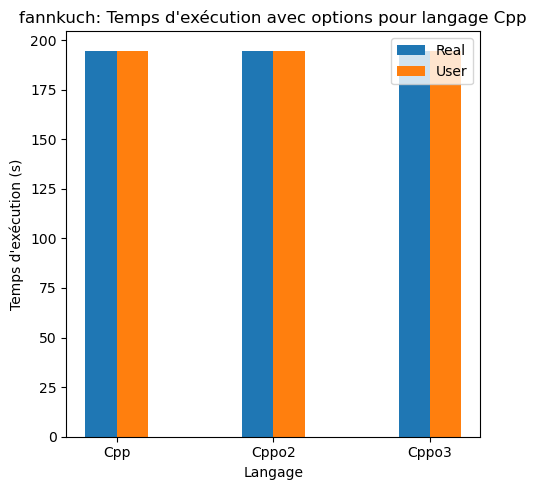

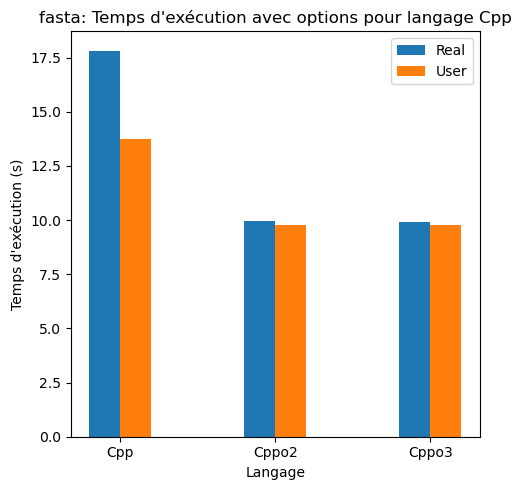

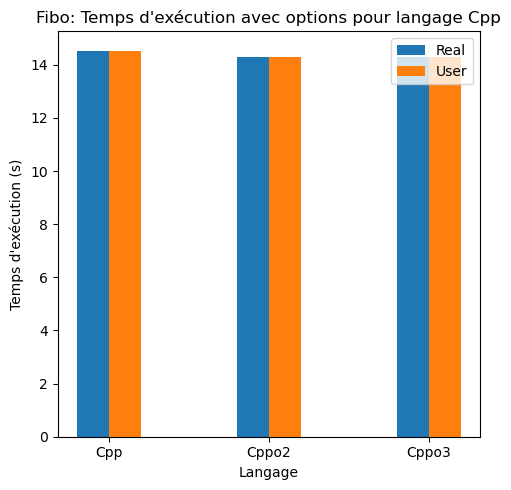

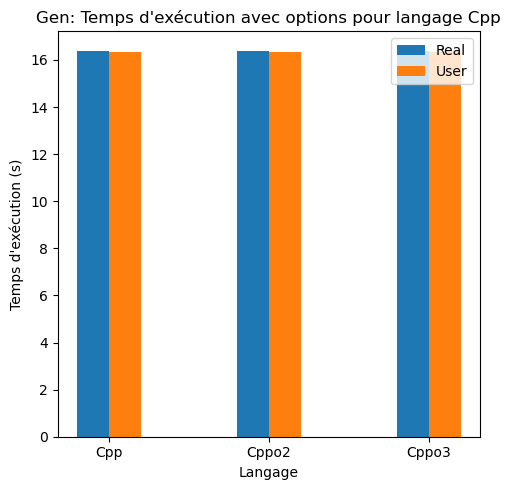

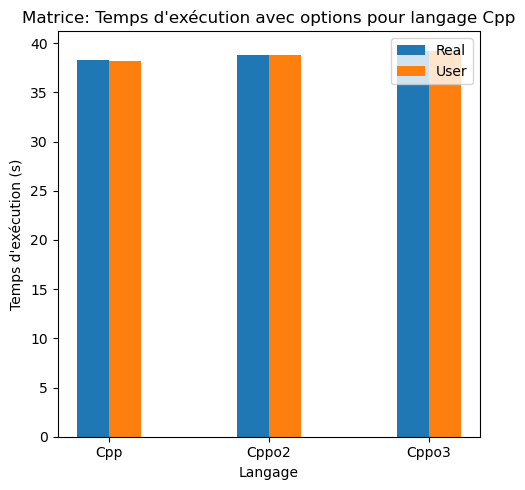

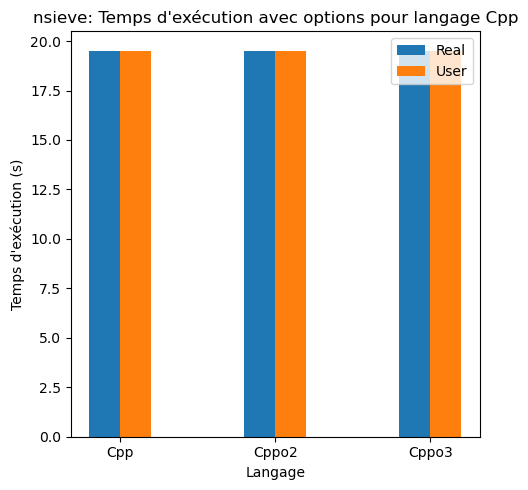

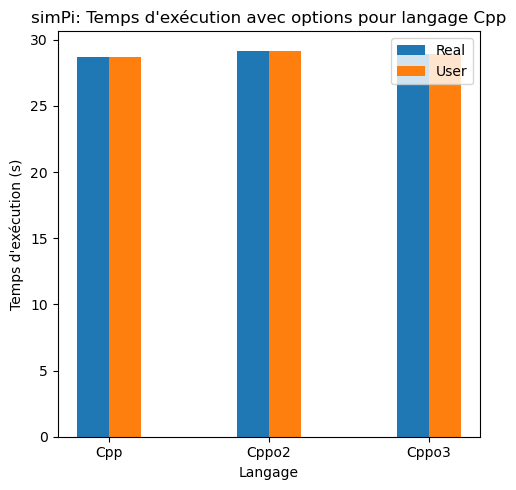

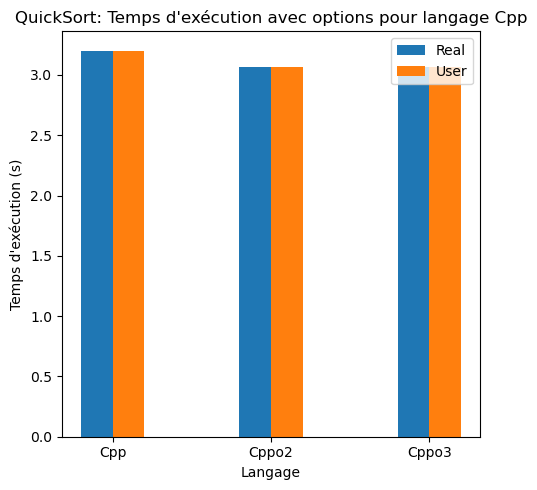

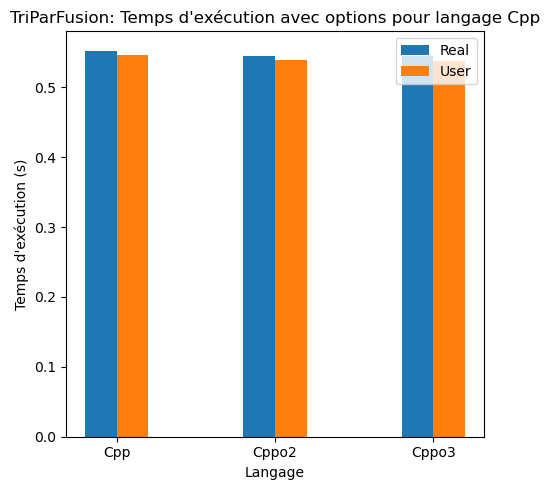

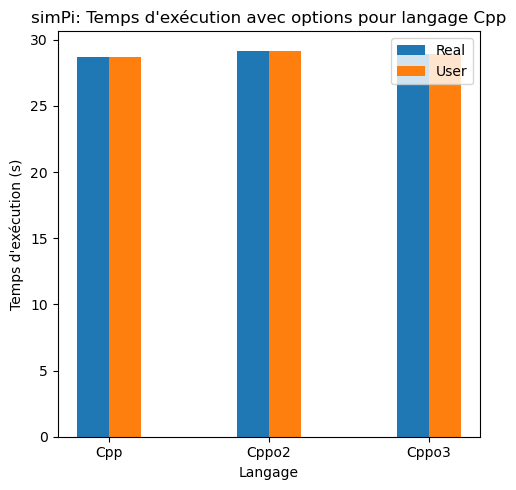

In [30]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['fannkuch', 'fasta', 'Fibo', 'Gen', 'Matrice', 'nsieve', 'simPi', 'QuickSort', 'TriParFusion', 'simPi']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier timeS.txt existe dans le dossier actuel
    if 'timeS.txt' in os.listdir(folder):
        # Ouvrir le fichier "timeS.txt" en mode lecture
        with open(os.path.join(folder, 'timeS.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage
                langage_match = re.match(r'time_results/time_results_(\w+).txt:', line)
                if langage_match:
                    langage = langage_match.group(1).capitalize()
                else:
                    continue

                # Lire la ligne suivante pour obtenir les temps de résulat
                results_line = next(file)
                real_value = float(re.search(r'real:\s*(\d+\.\d+)', results_line).group(1))
                user_value = float(re.search(r'user:\s*(\d+\.\d+)', results_line).group(1))
                sys_value = float(re.search(r'sys:\s*(\d+\.\d+)', results_line).group(1))

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'real': real_value,
                    'user': user_value,
                    'sys': sys_value
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)

        # Filtrer le DataFrame pour inclure uniquement les langages C++, C++ o2, C++ o3
        df_filtered = df[df['langage'].isin(['Cpp', 'Cppo2', 'Cppo3'])]


        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['real'], bar_width, label='Real')
        axs.bar([i + bar_width for i in index], df_filtered['user'], bar_width, label='User')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Temps d\'exécution (s)')
        axs.set_title(folder+': Temps d\'exécution avec options pour langage Cpp')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        plt.tight_layout()
        plt.show()


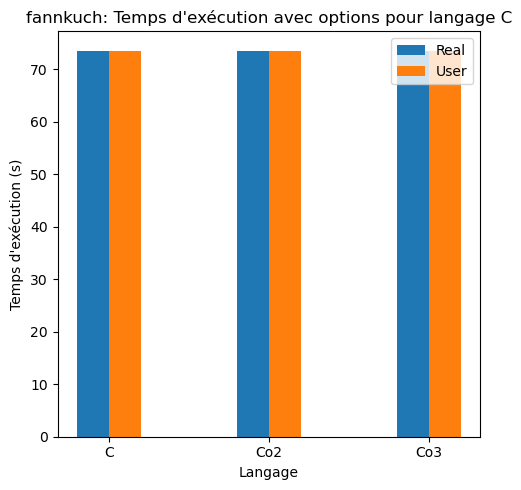

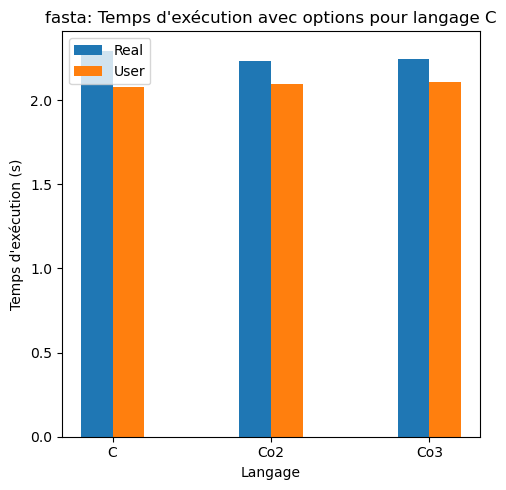

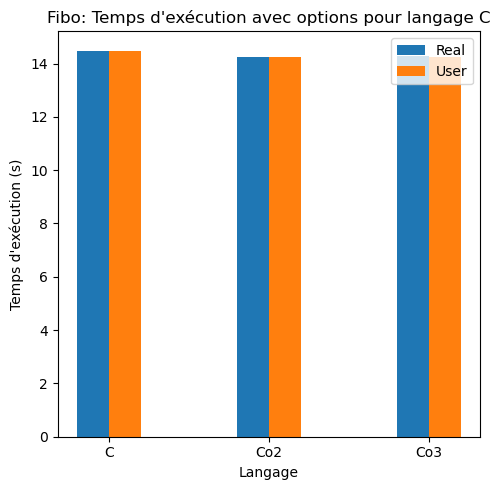

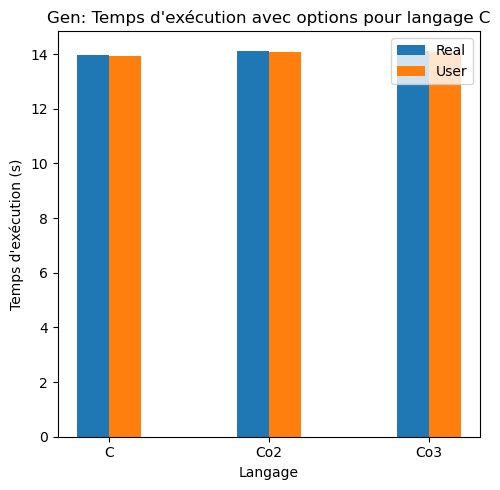

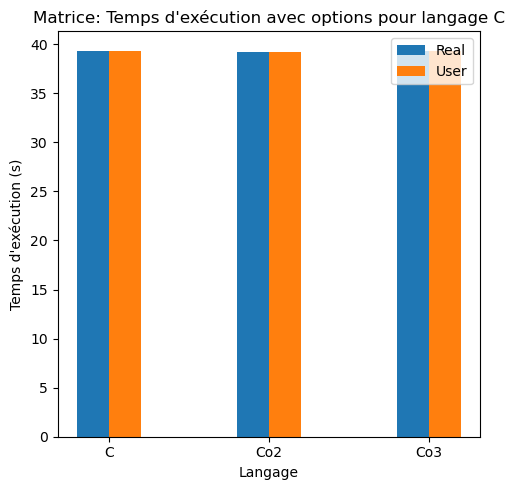

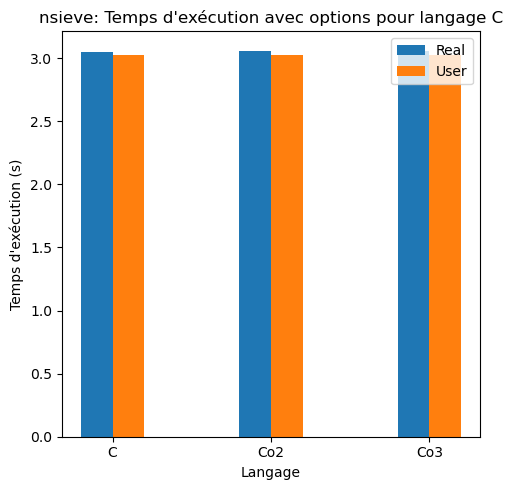

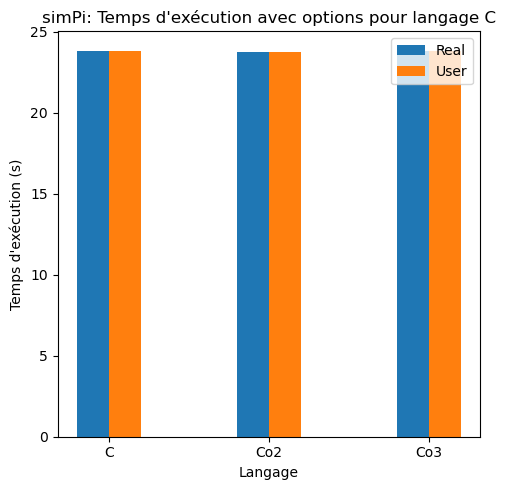

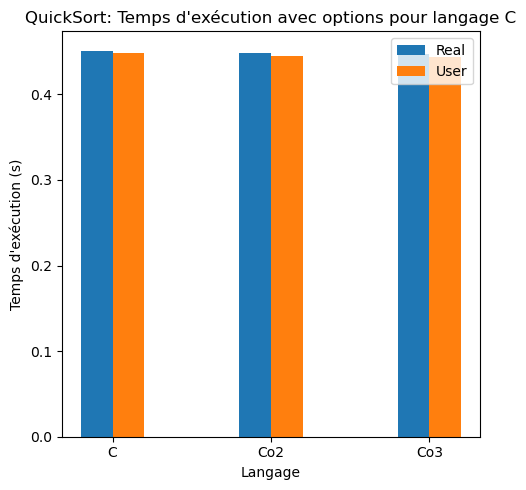

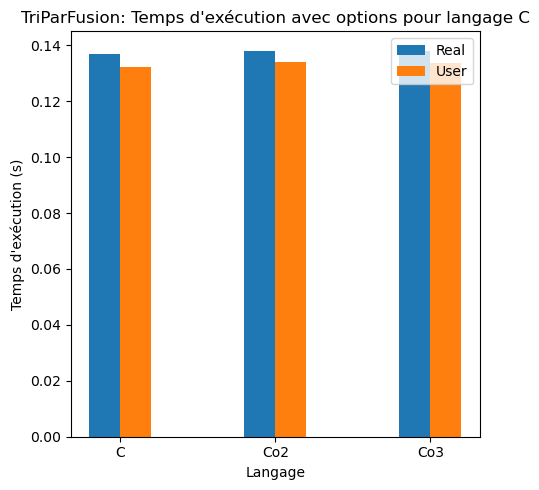

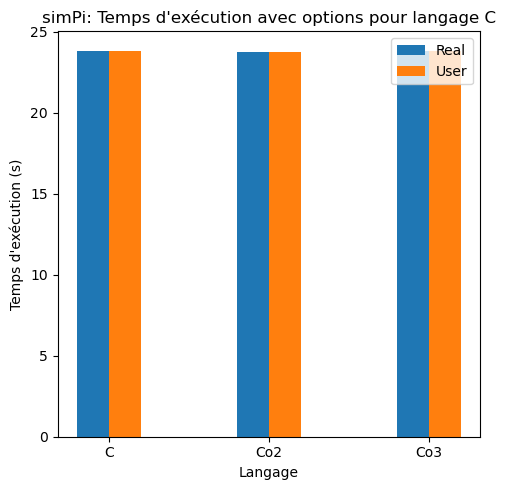

In [29]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['fannkuch', 'fasta', 'Fibo', 'Gen', 'Matrice', 'nsieve', 'QuickSort', 'TriParFusion', 'simPi']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier timeS.txt existe dans le dossier actuel
    if 'timeS.txt' in os.listdir(folder):
        # Ouvrir le fichier "timeS.txt" en mode lecture
        with open(os.path.join(folder, 'timeS.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage
                langage_match = re.match(r'time_results/time_results_(\w+).txt:', line)
                if langage_match:
                    langage = langage_match.group(1).capitalize()
                else:
                    continue

                # Lire la ligne suivante pour obtenir les temps de résulat
                results_line = next(file)
                real_value = float(re.search(r'real:\s*(\d+\.\d+)', results_line).group(1))
                user_value = float(re.search(r'user:\s*(\d+\.\d+)', results_line).group(1))
                sys_value = float(re.search(r'sys:\s*(\d+\.\d+)', results_line).group(1))

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'real': real_value,
                    'user': user_value,
                    'sys': sys_value
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)

        # Filtrer le DataFrame pour inclure uniquement les langages C++, C++ o2, C++ o3
        df_filtered = df[df['langage'].isin(['C', 'Co2', 'Co3'])]

        # Trier les données dans l'ordre C, Co2, Co3
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['real'], bar_width, label='Real')
        axs.bar([i + bar_width for i in index], df_filtered['user'], bar_width, label='User')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Temps d\'exécution (s)')
        axs.set_title(folder+': Temps d\'exécution avec options pour langage C')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        plt.tight_layout()
        plt.show()


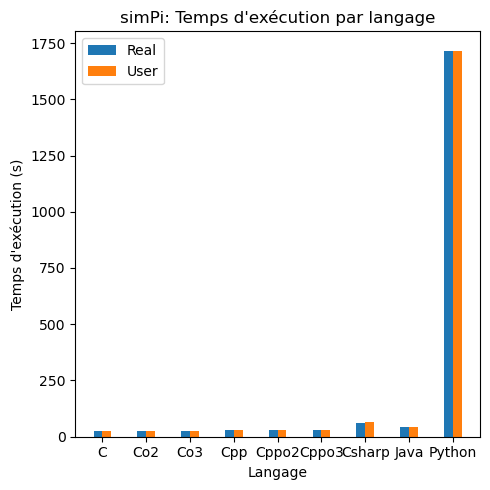

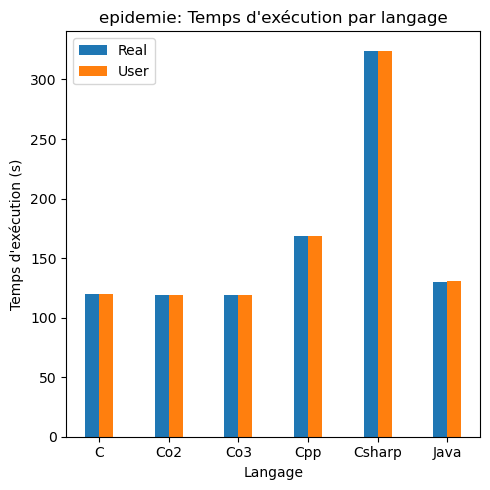

In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['simPi', 'epidemie']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier timeS.txt existe dans le dossier actuel
    if 'timeS.txt' in os.listdir(folder):
        # Ouvrir le fichier "timeS.txt" en mode lecture
        with open(os.path.join(folder, 'timeS.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage
                langage_match = re.match(r'time_results/time_results_(\w+).txt:', line)
                if langage_match:
                    langage = langage_match.group(1).capitalize()
                else:
                    continue

                # Lire la ligne suivante pour obtenir les temps de résulat
                results_line = next(file)
                real_value = float(re.search(r'real:\s*(\d+\.\d+)', results_line).group(1))
                user_value = float(re.search(r'user:\s*(\d+\.\d+)', results_line).group(1))
                sys_value = float(re.search(r'sys:\s*(\d+\.\d+)', results_line).group(1))

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'real': real_value,
                    'user': user_value,
                    'sys': sys_value
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)

        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['Cpp','Co2','Co3','Cppo2','Cppo3', 'C', 'Java', 'Ruby', 'Python','Csharp'])]

        df_filtered = df_filtered.sort_values(by='langage', ascending=True)
        
        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['real'], bar_width, label='Real')
        axs.bar([i + bar_width for i in index], df_filtered['user'], bar_width, label='User')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Temps d\'exécution (s)')
        axs.set_title(folder+': Temps d\'exécution par langage')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


Simulation stochastique :

- simPi: 
| Rang | Langage |
|------|---------|
| 1    | C       |
| 2    | Java    |
| 3    | Cpp     |
| 4    | Python  |
| 5    | Cshap   |

- Epidémie
| Rang | Langage |
|------|---------|
| 1    | C       |
| 2    | Java    |
| 3    | Cpp     |
| 4    | Csharp  |
| 5    | Python  |

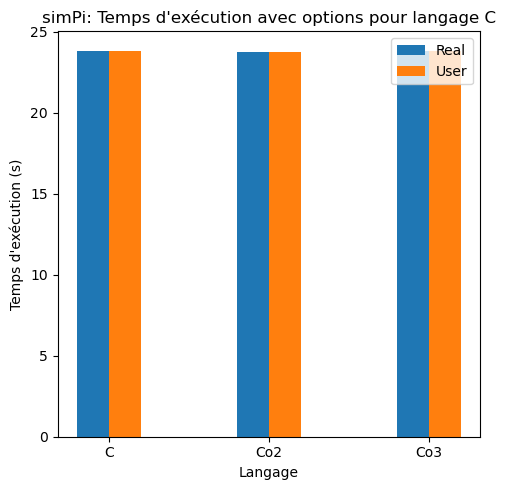

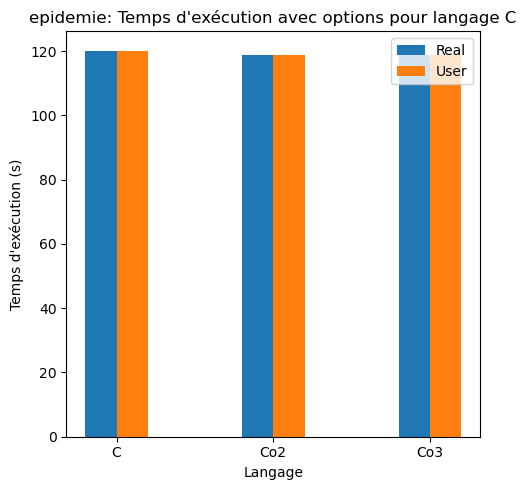

In [40]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['simPi', 'epidemie']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier timeS.txt existe dans le dossier actuel
    if 'timeS.txt' in os.listdir(folder):
        # Ouvrir le fichier "timeS.txt" en mode lecture
        with open(os.path.join(folder, 'timeS.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage
                langage_match = re.match(r'time_results/time_results_(\w+).txt:', line)
                if langage_match:
                    langage = langage_match.group(1).capitalize()
                else:
                    continue

                # Lire la ligne suivante pour obtenir les temps de résulat
                results_line = next(file)
                real_value = float(re.search(r'real:\s*(\d+\.\d+)', results_line).group(1))
                user_value = float(re.search(r'user:\s*(\d+\.\d+)', results_line).group(1))
                sys_value = float(re.search(r'sys:\s*(\d+\.\d+)', results_line).group(1))

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'real': real_value,
                    'user': user_value,
                    'sys': sys_value
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)

        # Filtrer le DataFrame pour inclure uniquement les langages C++, C++ o2, C++ o3
        df_filtered = df[df['langage'].isin(['C', 'Co2', 'Co3'])]

        # Trier les données dans l'ordre C, Co2, Co3
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['real'], bar_width, label='Real')
        axs.bar([i + bar_width for i in index], df_filtered['user'], bar_width, label='User')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Temps d\'exécution (s)')
        axs.set_title(folder+': Temps d\'exécution avec options pour langage C')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        plt.tight_layout()
        plt.show()


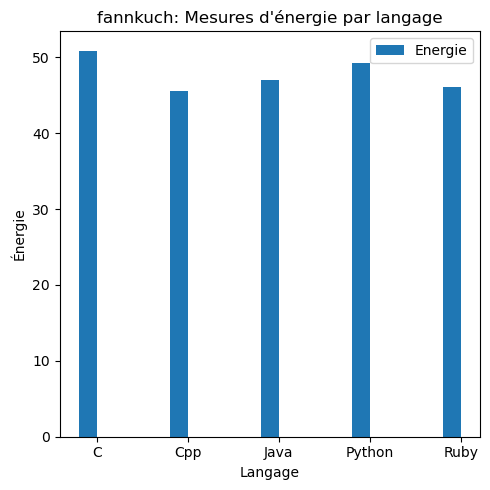

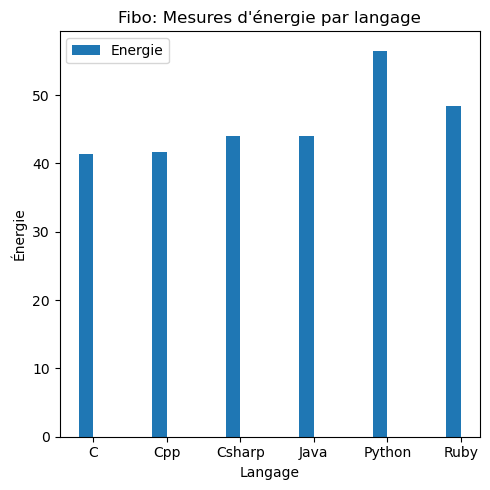

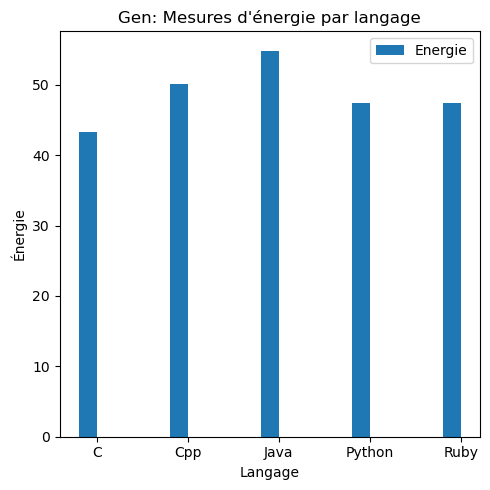

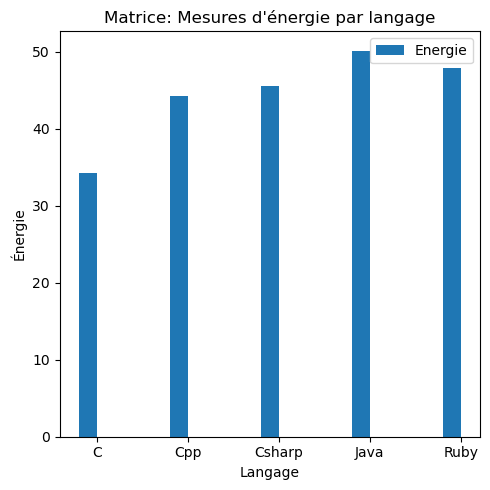

In [32]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['fannkuch','Fibo','Gen', 'Matrice']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier energy.txt existe dans le dossier actuel
    if 'avgUnity.txt' in os.listdir(folder):
        # Ouvrir le fichier "energy.txt" en mode lecture
        with open(os.path.join(folder, 'avgUnity.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage et la mesure d'énergie
                langage_match = re.match(r'(\w+)\s+(\d+,\d+)', line)
                if langage_match:
                    langage = langage_match.group(1).capitalize()
                    energy = float(langage_match.group(2).replace(',', '.'))
                else:
                    continue

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'energy': energy
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)

        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['Cpp', 'C', 'Java', 'Ruby', 'Python','Csharp'])]

        # Trier les données sur l'axe des abscisses par ordre alphabétique
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['energy'], bar_width, label='Energie')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Énergie')
        axs.set_title(folder+': Mesures d\'énergie par langage')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


### Fannkuch : 
- Exécuté avec paramètre d'entrée = 1
| Rang | Langage |
|------|---------|
| 1    | Cpp     |
| 2    | Ruby    |
| 3    | Java    |
| 4    | Python  |
| 5    | C       |

### Fibo : 
- Exécuté avec paramètre d'entrée = 10 000 000
| Rang | Langage |
|------|---------|
| 1    | C       |
| 2    | Cpp     |
| 3    | Java    |
| 4    | Cshap   |
| 5    | Ruby    |
| 6    | Python  |


### Gen :
- Exécuté avec paramètre d'entrée = 1 000 000
| Rang | Langage |
|------|---------|
| 1    | C       |
| 2    | Python  |
| 3    | Ruby    |
| 4    | Cpp     |
| 5    | Java    |


### Matrice :
- Produit de deux matrices chacune de taille : 1800 x 1800
| Rang | Langage |
|------|---------|
| 1    | C       |
| 2    | Cpp     |
| 3    | Csharp  |
| 4    | Ruby    |
| 5    | Java    |



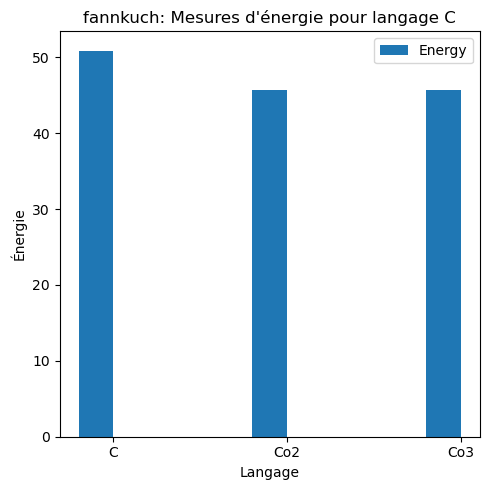

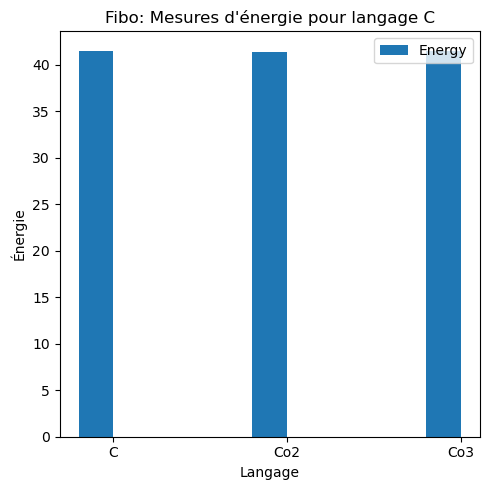

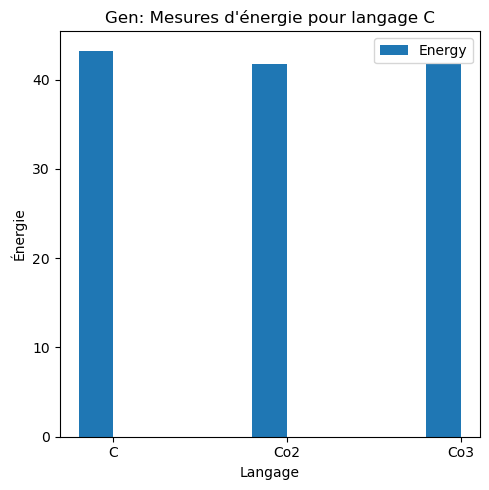

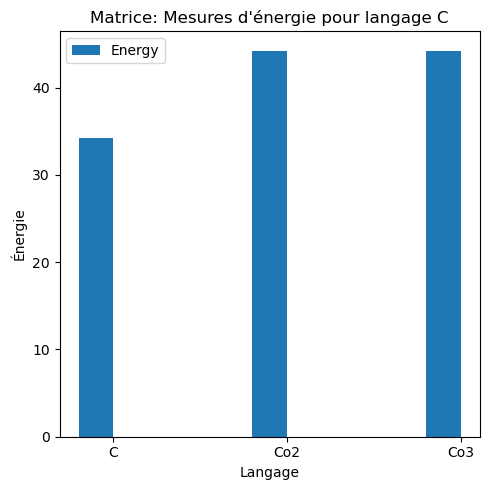

In [68]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['fannkuch','Fibo','Gen', 'Matrice']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier energy.txt existe dans le dossier actuel
    if 'avgUnity.txt' in os.listdir(folder):
        # Ouvrir le fichier "energy.txt" en mode lecture
        with open(os.path.join(folder, 'avgUnity.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage et la mesure d'énergie
                langage_match = re.match(r'(\w+)\s+(\d+,\d+)', line)
                if langage_match:
                    langage = langage_match.group(1).capitalize()
                    energy = float(langage_match.group(2).replace(',', '.'))
                else:
                    continue

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'energy': energy
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)

        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['C', 'Co2', 'Co3'])]

        # Trier les données sur l'axe des abscisses par ordre alphabétique
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['energy'], bar_width, label='Energy')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Énergie')
        axs.set_title(folder+': Mesures d\'énergie pour langage C')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


### Fannkuch : 
- Exécuté avec paramètre d'entrée = 1
| Rang | Langage |
|------|---------|
| 1    | C -O2   |
| 2    | C -O3   |
| 3    | C       |

### Fibo : 
- Exécuté avec paramètre d'entrée = 10 000 000
| Rang | Langage |
|------|---------|
| 1    | C -O2   |
| 2    | C       |
| 3    | C -O3   |

### Gen :
- Exécuté avec paramètre d'entrée = 1 000 000
| Rang | Langage |
|------|---------|
| 1    | C -O3   |
| 2    | C -O2   |
| 3    | C       |

### Matrice :
- Produit de deux matrices chacune de taille : 1800 x 1800
| Rang | Langage |
|------|---------|
| 1    | C       |
| 2    | C -O3   |
| 3    | C -O2   |


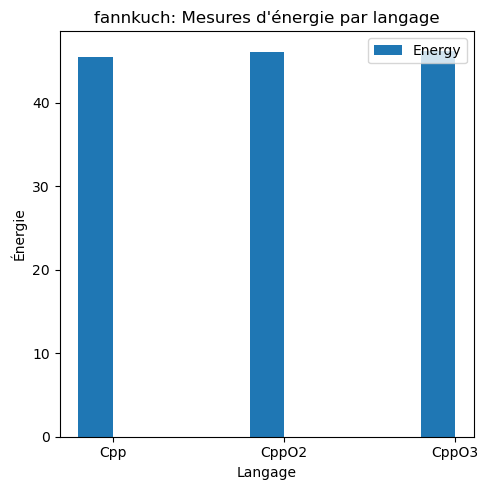

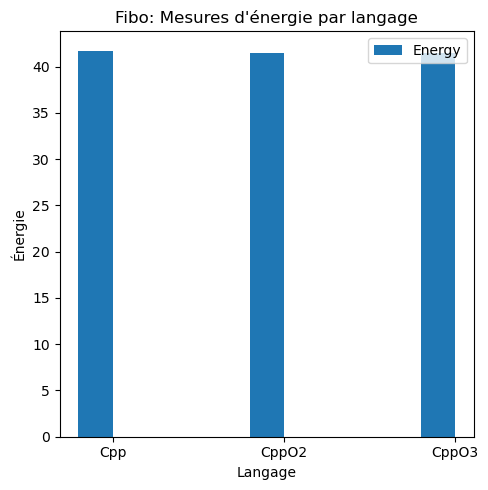

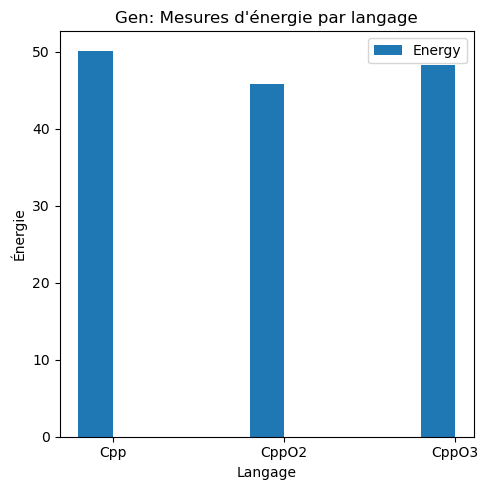

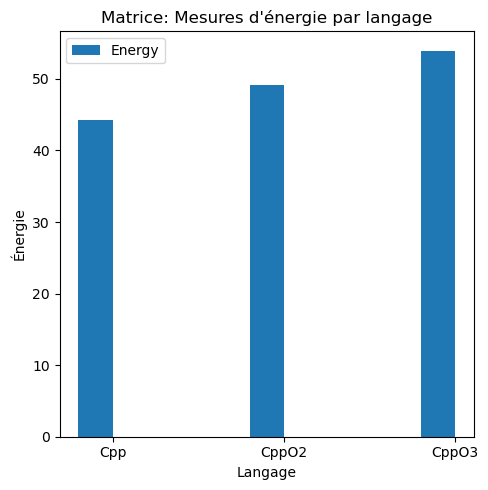

In [67]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['fannkuch','Fibo','Gen', 'Matrice']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier energy.txt existe dans le dossier actuel
    if 'avgUnity.txt' in os.listdir(folder):
        # Ouvrir le fichier "energy.txt" en mode lecture
        with open(os.path.join(folder, 'avgUnity.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage et la mesure d'énergie
                langage_match = re.match(r'(\w+)\s+(\d+,\d+)', line)
                if langage_match:
                    langage = langage_match.group(1)
                    energy = float(langage_match.group(2).replace(',', '.'))
                else:
                    continue

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'energy': energy
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)
        
        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['Cpp', 'CppO2', 'CppO3'])]
     
        # Trier les données sur l'axe des abscisses par ordre alphabétique
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['energy'], bar_width, label='Energy')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Énergie')
        axs.set_title(folder+': Mesures d\'énergie pour langage Cpp')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


### Fannkuch : 
- Exécuté avec paramètre d'entrée = 1
| Rang | Langage |
|------|---------|
| 1    | Cpp     |
| 2    | Cpp -O2 |
| 3    | Cpp -O3 |

### Fibo : 
- Exécuté avec paramètre d'entrée = 10 000 000
| Rang | Langage |
|------|---------|
| 1    | Cpp -O2 |
| 2    | Cpp -O3 |
| 3    | Cpp     |

### Gen :
- Exécuté avec paramètre d'entrée = 1 000 000
| Rang | Langage |
|------|---------|
| 1    | Cpp -O2 |
| 2    | Cpp -O3 |
| 3    | Cpp     |

### Matrice :
- Produit de deux matrices chacune de taille : 1800 x 1800
| Rang | Langage |
|------|---------|
| 1    | Cpp     |
| 2    | Cpp -O2 |
| 3    | Cpp -O3 |

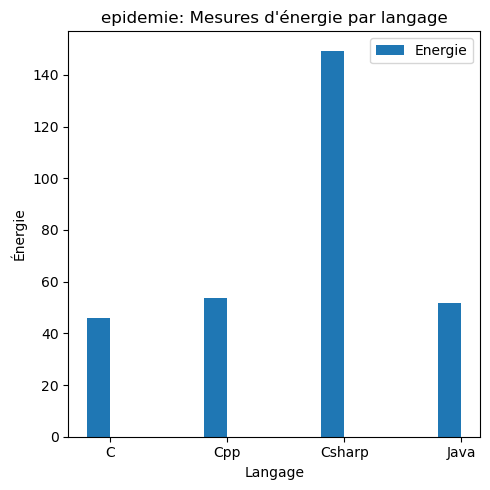

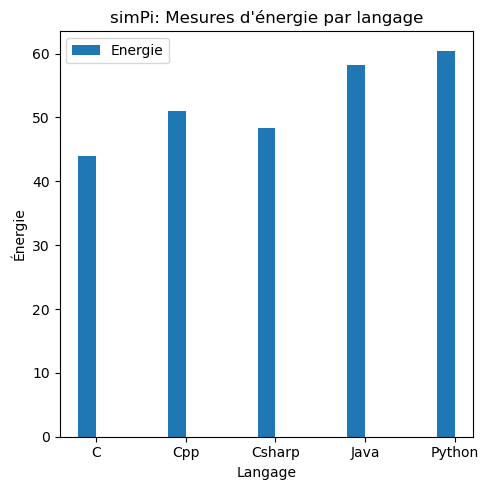

In [26]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['epidemie','simPi']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier energy.txt existe dans le dossier actuel
    if 'avgUnity.txt' in os.listdir(folder):
        # Ouvrir le fichier "energy.txt" en mode lecture
        with open(os.path.join(folder, 'avgUnity.txt'), 'r') as file:
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage et la mesure d'énergie
                langage_match = re.match(r'(\w+)\s+(\d+,\d+)', line)
                if langage_match:
                    langage = langage_match.group(1)
                    energy = float(langage_match.group(2).replace(',', '.'))
                else:
                    continue

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'energy': energy
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)
        
        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['Cpp', 'C', 'Java', 'Ruby', 'Python','Csharp'])]

        # Trier les données sur l'axe des abscisses par ordre alphabétique
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['energy'], bar_width, label='Energie')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Énergie')
        axs.set_title(folder+': Mesures d\'énergie par langage')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


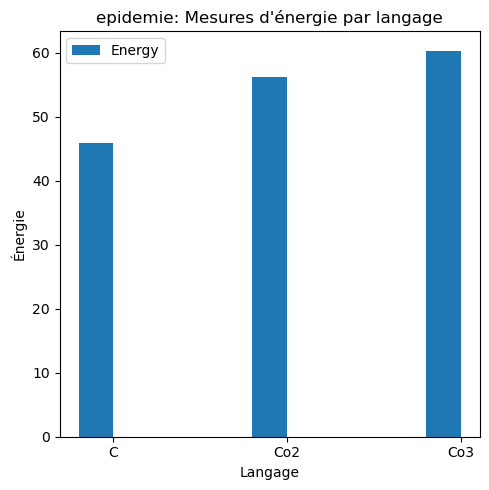

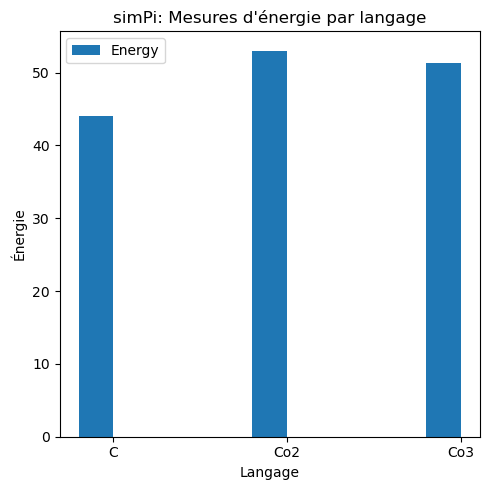

In [78]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['epidemie','simPi']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier energy.txt existe dans le dossier actuel
    if 'avgUnity.txt' in os.listdir(folder):
        # Ouvrir le fichier "energy.txt" en mode lecture
        with open(os.path.join(folder, 'avgUnity.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage et la mesure d'énergie
                langage_match = re.match(r'(\w+)\s+(\d+,\d+)', line)
                if langage_match:
                    langage = langage_match.group(1)
                    energy = float(langage_match.group(2).replace(',', '.'))
                else:
                    continue

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'energy': energy
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)
        
        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['C', 'Co2', 'Co3'])]

        # Trier les données sur l'axe des abscisses par ordre alphabétique
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['energy'], bar_width, label='Energie')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Énergie')
        axs.set_title(folder+': Mesures d\'énergie par langage')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


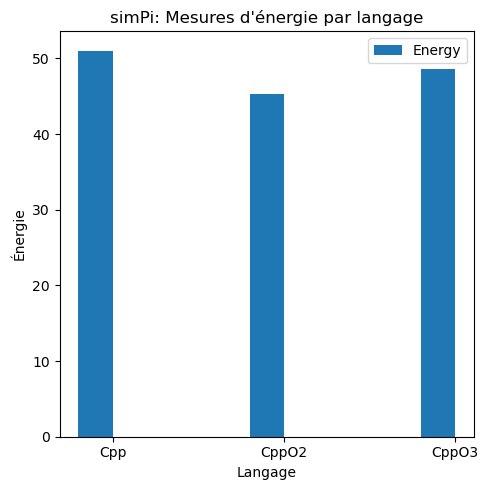

In [80]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Liste des dossiers à parcourir
folders = ['simPi']

# Parcourir les dossiers
for folder in folders:
    # Créer une liste vide pour stocker les dictionnaires de données
    data = []
    
    # Vérifier si le fichier energy.txt existe dans le dossier actuel
    if 'avgUnity.txt' in os.listdir(folder):
        # Ouvrir le fichier "energy.txt" en mode lecture
        with open(os.path.join(folder, 'avgUnity.txt'), 'r') as file:
            # Lire chaque ligne du fichier
            for line in file:
                # Utiliser une expression régulière pour extraire le nom du langage et la mesure d'énergie
                langage_match = re.match(r'(\w+)\s+(\d+,\d+)', line)
                if langage_match:
                    langage = langage_match.group(1)
                    energy = float(langage_match.group(2).replace(',', '.'))
                else:
                    continue

                # Créer un dictionnaire de données pour le langage actuel
                langage_data = {
                    'langage': langage.strip(),
                    'energy': energy
                }

                # Ajouter le dictionnaire de données à la liste
                data.append(langage_data)

        # Créer un DataFrame Pandas à partir de la liste de dictionnaires de données
        df = pd.DataFrame(data)
        
        # Filtrer le DataFrame pour inclure uniquement les langages C++, C, Java et Ruby
        df_filtered = df[df['langage'].isin(['Cpp', 'CppO2', 'CppO3'])]

        # Trier les données sur l'axe des abscisses par ordre alphabétique
        df_filtered = df_filtered.sort_values(by='langage', ascending=True)

        # Tracer le graphique à barres
        fig, axs = plt.subplots(1, 1, figsize=(5, 5))

        # Premier graphique
        bar_width = 0.2
        index = range(len(df_filtered['langage']))
        axs.bar(index, df_filtered['energy'], bar_width, label='Energy')
        axs.set_xlabel('Langage')
        axs.set_ylabel('Énergie')
        axs.set_title(folder+': Mesures d\'énergie pour langage C')
        axs.set_xticks([i + bar_width / 2 for i in index])
        axs.set_xticklabels(df_filtered['langage'])
        axs.legend()

        
        plt.tight_layout()
        plt.show()


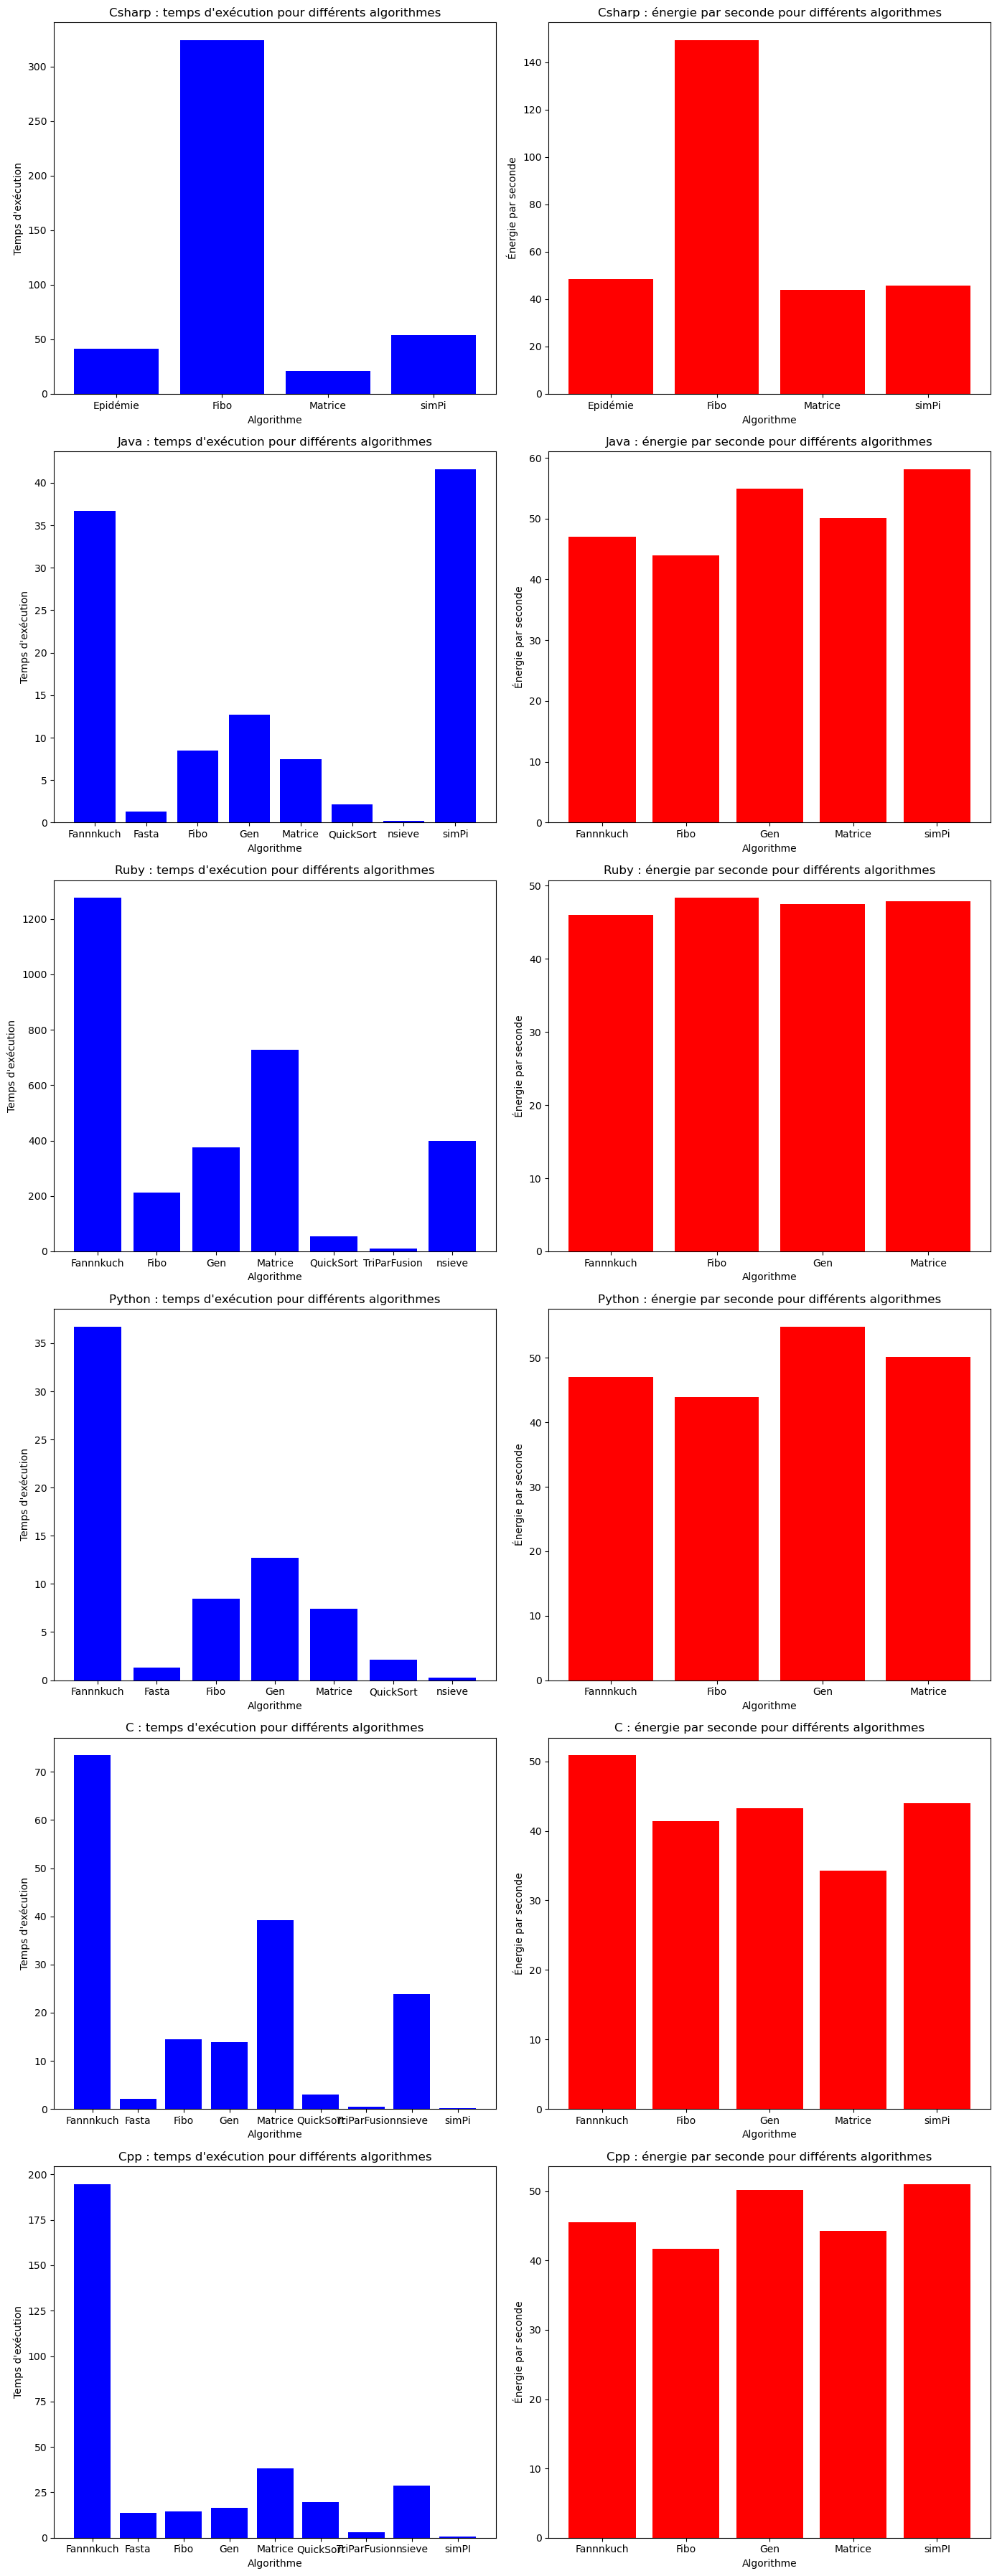

In [31]:
import os
import matplotlib.pyplot as plt

# Fonction pour lire et traiter les données d'un fichier
def process_file(file_path):
    # Créer une liste pour stocker les données extraites
    data = []

    # Ouvrir le fichier texte en mode lecture
    with open(file_path, 'r') as file:
        # Lire chaque ligne du fichier
        for line in file:
            # Diviser la ligne en colonnes en utilisant les espaces comme séparateurs
            columns = line.strip().split()
            
            # Vérifier si la ligne contient des données réelles (et non des titres)
            if len(columns) >= 2 and columns[0] != "langage":
                # Extraire les informations nécessaires
                algo = columns[0]
                try:
                    time_execution = float(columns[1].replace(',', '.'))
                except ValueError:
                    continue  # Ignorer les lignes où la conversion en float échoue

                # Vérifier si l'énergie par seconde est disponible dans la ligne
                if len(columns) >= 3:
                    try:
                        energy_per_sec = float(columns[2].replace(',', '.'))
                    except ValueError:
                        energy_per_sec = None
                else:
                    energy_per_sec = None

                # Ajouter les données extraites à la liste
                data.append({'Algo': algo, 'Temps_execution': time_execution, 'Energie_par_seconde': energy_per_sec})

    return data


# Chemin du répertoire contenant les fichiers
directory = "Res"

# Récupérer la liste des fichiers dans le répertoire
files = os.listdir(directory)

# Créer les sous-graphiques
fig, axs = plt.subplots(len(files), 2, figsize=(14, 6 * len(files)))

# Parcourir tous les fichiers dans le répertoire
for i, file_name in enumerate(files):
    # Chemin complet du fichier
    file_path = os.path.join(directory, file_name)
    
    # Lire et traiter les données du fichier
    data = process_file(file_path)
    file_title = file_name.split('.')[0]
    # Filtrer les données pour exclure les valeurs None
    algos_filtered = [entry['Algo'] for entry in data]
    
    # Premier graphique : Temps d'exécution
    axs[i, 0].bar(sorted(algos_filtered), [entry['Temps_execution'] for entry in data], color='blue')
    axs[i, 0].set_title(file_title+' : temps d\'exécution pour différents algorithmes')
    axs[i, 0].set_xlabel('Algorithme')
    axs[i, 0].set_ylabel('Temps d\'exécution')

    # Deuxième graphique : Énergie par seconde (uniquement les valeurs non nulles)
    axs[i, 1].bar(sorted([entry['Algo'] for entry in data if entry['Energie_par_seconde'] is not None]),
                  [entry['Energie_par_seconde'] for entry in data if entry['Energie_par_seconde'] is not None],
                  color='red')
    axs[i, 1].set_title(file_title+' : énergie par seconde pour différents algorithmes')
    axs[i, 1].set_xlabel('Algorithme')
    axs[i, 1].set_ylabel('Énergie par seconde')

# Afficher les graphiques
plt.tight_layout()
plt.show()


### Reproductibilité Numérique : Simulation Epidémie

In [17]:
import os

def compare_csv_files(folders):
    not_identical_files = []

    for i in range(len(folders)):
        for j in range(i + 1, len(folders)):
            folder1 = folders[i]
            folder2 = folders[j]

            resultats_folder_path1 = os.path.join('epidemie', str(folder1), 'resultats')
            resultats_folder_path2 = os.path.join('epidemie', str(folder2), 'resultats')

            exp_csv_paths1 = [os.path.join(resultats_folder_path1, f'exp{k}.csv') for k in range(100)]
            exp_csv_paths2 = [os.path.join(resultats_folder_path2, f'exp{k}.csv') for k in range(100)]

            for file1, file2 in zip(exp_csv_paths1, exp_csv_paths2):
                try:
                    with open(file1, 'r') as file1_handle, open(file2, 'r') as file2_handle:
                        content1 = file1_handle.read()
                        content2 = file2_handle.read()

                        if content1 != content2:
                            not_identical_files.append((file1, file2))
                except FileNotFoundError:
                    return False

    if not_identical_files:
        print("The following files are not identical:")
        for file1, file2 in not_identical_files:
            print(f"    {file1} and {file2}")
        return False
    else:
        print("All files are identical.")
        return True

folders = ['java', 'cpp', 'C', 'python', 'csharp']
are_identical = compare_csv_files(folders)



The following files are not identical:
    epidemie/java/resultats/exp86.csv and epidemie/cpp/resultats/exp86.csv
    epidemie/java/resultats/exp87.csv and epidemie/cpp/resultats/exp87.csv
    epidemie/java/resultats/exp88.csv and epidemie/cpp/resultats/exp88.csv
    epidemie/java/resultats/exp89.csv and epidemie/cpp/resultats/exp89.csv
    epidemie/java/resultats/exp90.csv and epidemie/cpp/resultats/exp90.csv
    epidemie/java/resultats/exp91.csv and epidemie/cpp/resultats/exp91.csv
    epidemie/java/resultats/exp92.csv and epidemie/cpp/resultats/exp92.csv
    epidemie/java/resultats/exp93.csv and epidemie/cpp/resultats/exp93.csv
    epidemie/java/resultats/exp94.csv and epidemie/cpp/resultats/exp94.csv
    epidemie/java/resultats/exp95.csv and epidemie/cpp/resultats/exp95.csv
    epidemie/java/resultats/exp96.csv and epidemie/cpp/resultats/exp96.csv
    epidemie/java/resultats/exp97.csv and epidemie/cpp/resultats/exp97.csv
    epidemie/java/resultats/exp98.csv and epidemie/cpp/result

 Tous les résultats sont identiques sauf pour Java à partir de la réplication 86.

### Produit matricielle 8*8 :

In [14]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results2/matrix_c.txt'
file_path_2 = 'Matrice/results2/matrix_cpp.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results2/matrix_c.txt'
file_path_2 = 'Matrice/results2/matrix_java.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results2/matrix_py.txt'
file_path_2 = 'Matrice/results2/matrix_c.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results2/matrix_py.txt'
file_path_2 = 'Matrice/results2/matrix_ruby.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## Produit matriciel 1800*1800

In [1]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results/matrix_c.txt'
file_path_2 = 'Matrice/results/matrix_cpp.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [2]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results/matrix_c.txt'
file_path_2 = 'Matrice/results/matrix_java.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -9.53674316e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [5]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results/matrix_py.txt'
file_path_2 = 'Matrice/results/matrix_c.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[3.25361229e+01 3.25361400e+01 3.25361550e+01 ... 3.25635130e+01
  3.25635281e+01 3.25635430e+01]
 [7.94129128e+01 7.94129560e+01 7.94129992e+01 ... 7.94922709e+01
  7.94923151e+01 7.94923608e+01]
 [1.26289429e+02 1.26289504e+02 1.26289575e+02 ... 1.26420769e+02
  1.26420840e+02 1.26420919e+02]
 ...
 [8.41390181e+04 8.41390674e+04 8.41391211e+04 ... 8.42323003e+04
  8.42323501e+04 8.42324006e+04]
 [8.41857283e+04 8.41857773e+04 8.41858301e+04 ... 8.42790581e+04
  8.42791089e+04 8.42791609e+04]
 [8.42324358e+04 8.42324893e+04 8.42325374e+04 ... 8.43258198e+04
  8.43258694e+04 8.43259219e+04]]


In [7]:
import numpy as np

# Fonction pour charger une matrice à partir d'un fichier texte
def load_matrix_from_file(file_path):
    with open(file_path, 'r') as file:
        matrix = np.loadtxt(file)
    return matrix

# Chemin des fichiers texte contenant les résultats de produits matriciels
file_path_1 = 'Matrice/results/matrix_ruby.txt'
file_path_2 = 'Matrice/results/matrix_py.txt'

# Charger les matrices à partir des fichiers texte
matrix_1 = load_matrix_from_file(file_path_1)
matrix_2 = load_matrix_from_file(file_path_2)

# Calculer la différence entre les deux matrices
difference_matrix = matrix_1 - matrix_2

# Afficher la différence
print("Différence entre les deux matrices :")
print(difference_matrix)

Différence entre les deux matrices :
[[-9.53674316e-07 -9.53674316e-07  0.00000000e+00 ... -9.53674316e-07
   9.53674316e-07  0.00000000e+00]
 [-9.53674316e-07 -1.19209290e-06  1.90734863e-06 ... -1.90734863e-06
   2.14576721e-06  0.00000000e+00]
 [-9.53674316e-07  4.29153442e-06  2.86102295e-06 ...  9.53674316e-07
   3.33786011e-06  9.53674316e-07]
 ...
 [-4.88281250e-04  7.32421875e-04  1.70898438e-03 ... -4.88281250e-04
  -7.32421875e-04  9.76562500e-04]
 [ 7.32421875e-04 -7.32421875e-04 -2.44140625e-04 ...  0.00000000e+00
   4.88281250e-04  2.44140625e-04]
 [-1.46484375e-03  2.44140625e-04 -1.70898438e-03 ...  7.32421875e-04
  -2.44140625e-04 -1.22070312e-03]]
